<a href="https://colab.research.google.com/github/Pdaret/MIO-TCD-CNN/blob/main/MIO_TCD_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'># Part 1</font>

# Under Fitting Model 

To induce underfitting in our model, we can make it less complex or reduce the capacity of the model. Here are a few modifications we can make to our model to encourage underfitting:

1. Decrease the number of filters in the convolutional layers: By reducing the number of filters, the model will extract fewer features, leading to a simpler representation.

2. Remove a convolutional layer: Removing a layer reduces the depth of the model and further simplifies it.

3. Reduce the number of neurons in the dense layer: By decreasing the number of neurons, you reduce the complexity of the model's fully connected layers.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset/train',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset/valid',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)


Found 15023 images belonging to 5 classes.
Found 5001 images belonging to 5 classes.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
117/117 [==============================] - 60s 455ms/step - loss: 1.6976 - accuracy: 0.2616 - val_loss: 1.4787 - val_accuracy: 0.3423
Epoch 2/10
117/117 [==============================] - 51s 433ms/step - loss: 1.5046 - accuracy: 0.2818 - val_loss: 1.4464 - val_accuracy: 0.3582
Epoch 3/10
117/117 [==============================] - 49s 424ms/step - loss: 1.4916 - accuracy: 0.2830 - val_loss: 1.3830 - val_accuracy: 0.3626
Epoch 4/10
117/117 [==============================] - 49s 421ms/step - loss: 1.4734 - accuracy: 0.2888 - val_loss: 1.3693 - val_accuracy: 0.3752
Epoch 5/10
117/117 [==============================] - 58s 500ms/step - loss: 1.4677 - accuracy: 0.2878 - val_loss: 1.3904 - val_accuracy: 0.3654
Epoch 6/10
117/117 [==============================] - 49s 419ms/step - loss: 1.4596 - accuracy: 0.2881 - val_loss: 1.3368 - val_accuracy: 0.3768
Epoch 7/10
117/117 [==============================] - 50s 427ms/step - loss: 1.4256 - accuracy: 0.3306 - val_loss: 1.2232 - val_ac

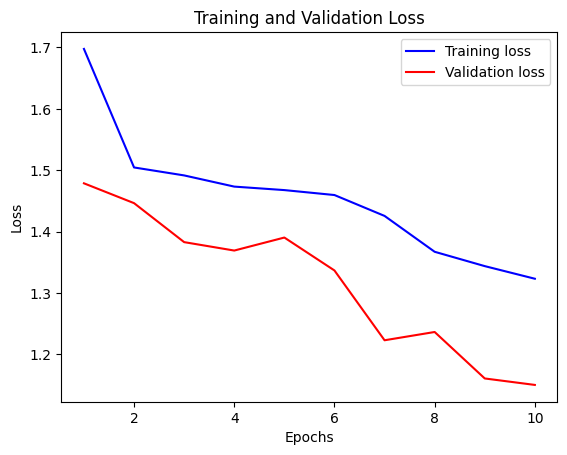

In [ ]:
import matplotlib.pyplot as plt

# Accessing the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset/test',
        target_size=(128, 128),
        batch_size=512,
        class_mode='categorical')

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Found 5000 images belonging to 5 classes.


<ipython-input-11-cacc37e2706b>:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 1.6117362976074219
Test accuracy: 0.20000000298023224


# Over Fitting Model
To induce overfitting in our model, we can increase its capacity or complexity. Here are a few modifications we can make to our model to encourage overfitting:

1. Increase the number of filters in the convolutional layers: By increasing the number of filters, the model can learn more complex features from the input data.

2. Add more convolutional layers: Increasing the depth of the model allows it to learn more intricate patterns in the data.

3. Increase the number of neurons in the dense layer: By adding more neurons, the model can capture more complex relationships in the data.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D, Activation

model = Sequential()
model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
    )

Epoch 1/10
117/117 [==============================] - 64s 549ms/step - loss: 0.9777 - accuracy: 0.6267 - val_loss: 0.7257 - val_accuracy: 0.7452
Epoch 2/10
117/117 [==============================] - 53s 456ms/step - loss: 0.6060 - accuracy: 0.7813 - val_loss: 0.5975 - val_accuracy: 0.7953
Epoch 3/10
117/117 [==============================] - 60s 511ms/step - loss: 0.4365 - accuracy: 0.8516 - val_loss: 0.4765 - val_accuracy: 0.8335
Epoch 4/10
117/117 [==============================] - 61s 520ms/step - loss: 0.3141 - accuracy: 0.8916 - val_loss: 0.4467 - val_accuracy: 0.8490
Epoch 5/10
117/117 [==============================] - 60s 516ms/step - loss: 0.2286 - accuracy: 0.9203 - val_loss: 0.4843 - val_accuracy: 0.8576
Epoch 6/10
117/117 [==============================] - 51s 440ms/step - loss: 0.1839 - accuracy: 0.9386 - val_loss: 0.3991 - val_accuracy: 0.8754
Epoch 7/10
117/117 [==============================] - 59s 505ms/step - loss: 0.1392 - accuracy: 0.9558 - val_loss: 0.4387 - val_ac

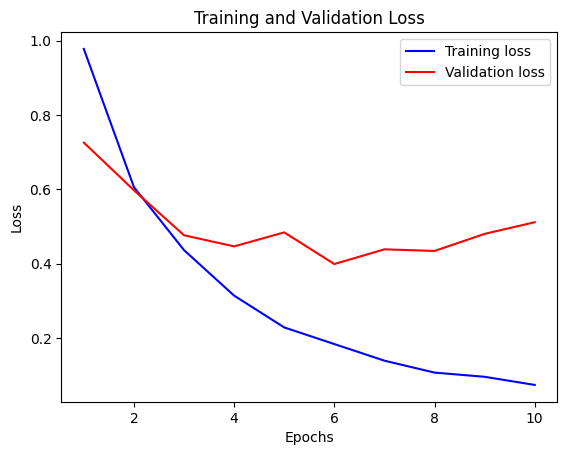

In [ ]:
import matplotlib.pyplot as plt

# Accessing the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset/test',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 5000 images belonging to 5 classes.


<ipython-input-7-cacc37e2706b>:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.7172591090202332
Test accuracy: 0.7674000263214111


# Best Fitting Model
To perform hyperparameter tuning for our model using two different methods, specifically setting the learning rate using `grid search` and setting the learning rate using the `wandb` or `comet` libraries, we can follow the code snippets provided below.

**First, I'll demonstrate how to set the learning rate using grid search. For this purpose, we'll use the `GridSearchCV` class from the `sklearn` library. Here's an code:**

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model architecture
def create_model(learning_rate):
    model = Sequential()
    model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the Keras classifier for use in GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=0)

# Define the grid search parameters
learning_rate = [0.0001, 0.001, 0.01, 0.1]

param_grid = dict(learning_rate=learning_rate)

# Load the data from the generator
X_train, y_train = next(train_generator)
X_val, y_val = next(validation_generator)

# Create the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))

# Print the best parameters and score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)

<ipython-input-24-15afdd8771bb>:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=0)


Best parameters:  {'learning_rate': 0.0001}
Best score:  0.36674050490061444


**now we plot the best model loss**

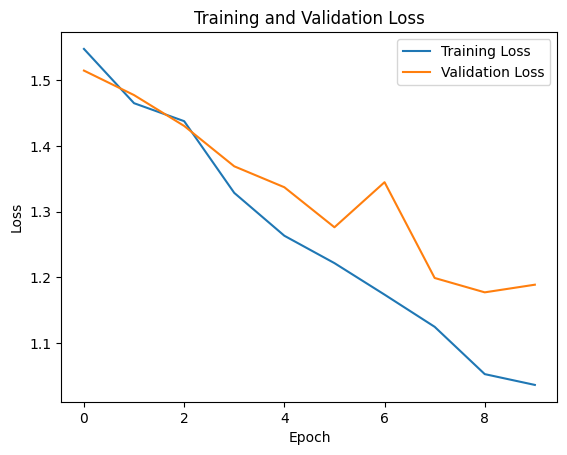

In [ ]:
import matplotlib.pyplot as plt

# Get the best parameters and corresponding model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_.model

# Train the model with the best parameters
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)

# Plot the loss on the training and validation sets
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Now, let's move on to setting the learning rate using the `wandb` or `comet` libraries. These libraries allow us to track and log experiments, including hyperparameters. Here's an code snippets using `wandb`:**

In [3]:
import wandb

wandb.login()


# Define sweep config
sweep_configuration = {
    'method': 'grid',
    'name': 'sweep_grid',
    'metric': {'goal': 'maximize', 'name': 'val_accuracy'},
    'parameters': {
        'learning_rate': {'values': [1e-3, 1e-4, 1e-5]}
    }
}

# Default values for hyper-parameters we're going to sweep over
configs = {
       'learning_rate' : 0.001
   }


wandb: Currently logged in as: mr-srezaei. Use `wandb login --relogin` to force relogin


In [4]:
# Initialize sweep by passing in the config
sweep_id = wandb.sweep(sweep_configuration, project="miotcd")

wandb: Network error (ReadTimeout), entering retry loop.


Create sweep with ID: 7zgqhsyq
Sweep URL: https://wandb.ai/mr-srezaei/miotcd/sweeps/7zgqhsyq


In [5]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wandb.keras import WandbCallback


def train(config = None):
    with wandb.init(config=config):
        config = wandb.config

        model = Sequential()
        model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(5, activation='softmax'))


        # Set the learning rate using wandb
        optimizer = Adam(learning_rate=config.learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Train the model and log the metrics
        model.fit(train_generator,
              steps_per_epoch=train_generator.n // train_generator.batch_size,
              epochs=10,
              validation_data=validation_generator,
              validation_steps=validation_generator.n // validation_generator.batch_size,
              callbacks=[WandbCallback()])
        wandb.log({'train_loss': model.history.history['loss'], 'val_loss': model.history.history['val_loss']})

In [6]:
wandb.agent(sweep_id, train, count=5)

wandb: Agent Starting Run: jbhenuzr with config:
wandb: 	learning_rate: 0.001


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 1.1485 - accuracy: 0.5381

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.4s


117/117 [==============================] - 79s 610ms/step - loss: 1.1485 - accuracy: 0.5381 - val_loss: 0.7554 - val_accuracy: 0.7183
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.7715

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.4s


117/117 [==============================] - 71s 605ms/step - loss: 0.6320 - accuracy: 0.7715 - val_loss: 0.6022 - val_accuracy: 0.7881
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.8448

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.8s


117/117 [==============================] - 60s 516ms/step - loss: 0.4469 - accuracy: 0.8448 - val_loss: 0.5489 - val_accuracy: 0.8259
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.3106 - accuracy: 0.8959

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.5s


117/117 [==============================] - 68s 585ms/step - loss: 0.3106 - accuracy: 0.8959 - val_loss: 0.4516 - val_accuracy: 0.8534
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.2243 - accuracy: 0.9225

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.5s


117/117 [==============================] - 69s 587ms/step - loss: 0.2243 - accuracy: 0.9225 - val_loss: 0.4276 - val_accuracy: 0.8744
Epoch 6/10
117/117 [==============================] - 55s 467ms/step - loss: 0.1726 - accuracy: 0.9406 - val_loss: 0.4545 - val_accuracy: 0.8592
Epoch 7/10
117/117 [==============================] - 62s 532ms/step - loss: 0.1297 - accuracy: 0.9584 - val_loss: 0.4372 - val_accuracy: 0.8780
Epoch 8/10
117/117 [==============================] - 53s 450ms/step - loss: 0.1056 - accuracy: 0.9664 - val_loss: 0.4651 - val_accuracy: 0.8722
Epoch 9/10
117/117 [==============================] - 61s 522ms/step - loss: 0.0834 - accuracy: 0.9727 - val_loss: 0.5455 - val_accuracy: 0.8776
Epoch 10/10
117/117 [==============================] - 52s 446ms/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 0.5951 - val_accuracy: 0.8710


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▃▂▂▁▁▁▁
val_accuracy,▁▄▆▇█▇████
val_loss,█▅▄▂▁▂▁▂▄▅
accuracy,0.97878
best_epoch,4
best_val_loss,0.42758
epoch,9
loss,0.06673
val_accuracy,0.87099


wandb: Agent Starting Run: l7jfdutt with config:
wandb: 	learning_rate: 0.0001


Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 1.2488 - accuracy: 0.4884

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 1.7s


117/117 [==============================] - 77s 645ms/step - loss: 1.2488 - accuracy: 0.4884 - val_loss: 0.8769 - val_accuracy: 0.6937
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.8659 - accuracy: 0.6816

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 6.9s


117/117 [==============================] - 73s 627ms/step - loss: 0.8659 - accuracy: 0.6816 - val_loss: 0.7876 - val_accuracy: 0.7165
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.7523

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 2.1s


117/117 [==============================] - 61s 518ms/step - loss: 0.6937 - accuracy: 0.7523 - val_loss: 0.6992 - val_accuracy: 0.7610
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.5837 - accuracy: 0.7915

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 1.8s


117/117 [==============================] - 67s 572ms/step - loss: 0.5837 - accuracy: 0.7915 - val_loss: 0.6243 - val_accuracy: 0.7780
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.8243

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 1.7s


117/117 [==============================] - 67s 575ms/step - loss: 0.5034 - accuracy: 0.8243 - val_loss: 0.5487 - val_accuracy: 0.8151
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.4339 - accuracy: 0.8542

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 3.0s


117/117 [==============================] - 72s 617ms/step - loss: 0.4339 - accuracy: 0.8542 - val_loss: 0.5038 - val_accuracy: 0.8323
Epoch 7/10
117/117 [==============================] - 52s 447ms/step - loss: 0.3767 - accuracy: 0.8730 - val_loss: 0.5365 - val_accuracy: 0.8285
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.8912

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 1.8s


117/117 [==============================] - 68s 588ms/step - loss: 0.3216 - accuracy: 0.8912 - val_loss: 0.4634 - val_accuracy: 0.8476
Epoch 9/10
117/117 [==============================] - 63s 538ms/step - loss: 0.2861 - accuracy: 0.9063 - val_loss: 0.4753 - val_accuracy: 0.8385
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.2563 - accuracy: 0.9160

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 4.6s


117/117 [==============================] - 72s 617ms/step - loss: 0.2563 - accuracy: 0.9160 - val_loss: 0.4443 - val_accuracy: 0.8564


accuracy,▁▄▅▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▂▄▅▆▇▇█▇█
val_loss,█▇▅▄▃▂▂▁▂▁
accuracy,0.91601
best_epoch,9
best_val_loss,0.44431
epoch,9
loss,0.25628
val_accuracy,0.85637


wandb: Agent Starting Run: 6qpf5tq9 with config:
wandb: 	learning_rate: 1e-05


Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 1.5452 - accuracy: 0.3141

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 3.7s


117/117 [==============================] - 72s 588ms/step - loss: 1.5452 - accuracy: 0.3141 - val_loss: 1.3889 - val_accuracy: 0.5853
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 1.2785 - accuracy: 0.5172

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 1.7s


117/117 [==============================] - 74s 630ms/step - loss: 1.2785 - accuracy: 0.5172 - val_loss: 1.0914 - val_accuracy: 0.6102
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 1.0983 - accuracy: 0.5887

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 1.9s


117/117 [==============================] - 61s 520ms/step - loss: 1.0983 - accuracy: 0.5887 - val_loss: 0.9626 - val_accuracy: 0.6675
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 1.0072 - accuracy: 0.6296

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 2.3s


117/117 [==============================] - 63s 541ms/step - loss: 1.0072 - accuracy: 0.6296 - val_loss: 0.9125 - val_accuracy: 0.6707
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.9463 - accuracy: 0.6497

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 4.4s


117/117 [==============================] - 79s 679ms/step - loss: 0.9463 - accuracy: 0.6497 - val_loss: 0.8700 - val_accuracy: 0.6921
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.8953 - accuracy: 0.6733

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 2.0s


117/117 [==============================] - 73s 625ms/step - loss: 0.8953 - accuracy: 0.6733 - val_loss: 0.8355 - val_accuracy: 0.6969
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.8615 - accuracy: 0.6823

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 1.7s


117/117 [==============================] - 68s 582ms/step - loss: 0.8615 - accuracy: 0.6823 - val_loss: 0.8085 - val_accuracy: 0.7131
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.8312 - accuracy: 0.6972

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 5.7s


117/117 [==============================] - 76s 650ms/step - loss: 0.8312 - accuracy: 0.6972 - val_loss: 0.7864 - val_accuracy: 0.7196
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.8053 - accuracy: 0.7096

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 6.8s


117/117 [==============================] - 78s 667ms/step - loss: 0.8053 - accuracy: 0.7096 - val_loss: 0.7709 - val_accuracy: 0.7306
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.7830 - accuracy: 0.7137

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 1.7s


117/117 [==============================] - 62s 530ms/step - loss: 0.7830 - accuracy: 0.7137 - val_loss: 0.7590 - val_accuracy: 0.7344


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▂▅▅▆▆▇▇██
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.71366
best_epoch,9
best_val_loss,0.75898
epoch,9
loss,0.78304
val_accuracy,0.73438


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
# Retrieve the logged loss values from WandB run
train_loss = wandb.history['train_loss']
val_loss = wandb.history['val_loss']

# Plot the loss on the training and validation sets
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# <font color='red'># Part 2</font>

in this phase we use `resnet18` to create a <font color = 'blue'>transfer learning</font> model and train it with our `MIO-TCD` dataset.then tune the `learning rate` hyper parameter using `wandb` library by `random search` method.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import wandb
from random import uniform

In [ ]:
# Initialize wandb for experiment tracking
wandb.init(project='Transfer-learning')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Define the data transformations for training and validation sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(128), # Randomly crop the image to size 128x128
        transforms.RandomHorizontalFlip(), # Randomly flip the image horizontally
        transforms.ToTensor(),  # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((128, 128)),  # Resize the image to 128x128
        transforms.ToTensor(), # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Normalize the image with mean and standard deviation
    ])
}

In [ ]:
# Set the directory paths for the dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset'
train_dir = data_dir + '/train'
val_dir = data_dir + '/valid'

In [ ]:
# Load the training and validation datasets using ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_data = datasets.ImageFolder(val_dir, transform=data_transforms['val'])

# Create data loaders for training and validation
train_loader = DataLoader(train_data, batch_size=1500, shuffle=True)
val_loader = DataLoader(val_data, batch_size=1500)

# Define the device for training (GPU if available, otherwise CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze the parameters of the pre-trained model
for param in model.parameters():
    param.requires_grad = False

# Get the number of input features for the last fully connected layer
num_features = model.fc.in_features

# Replace the last fully connected layer with a new one (output size 5)
model.fc = nn.Linear(num_features, 5)

# Transfer the model to the device
model = model.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
def train_model(learning_rate):
    # Update the optimizer with the new learning rate
    optimizer = optim.SGD(model.fc.parameters(), lr=learning_rate, momentum=0.9)

    # Rest of your training and evaluation code here
    num_epochs = 10

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_preds = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate the number of correct predictions
                _, preds = torch.max(outputs, 1)
                correct_preds += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_acc = correct_preds / len(val_loader.dataset)

        # Log the learning rate, accuracy, and loss to wandb
        wandb.log({'learning_rate': learning_rate, 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    return epoch_acc


In [ ]:
num_searches = 3 # Number of random searches
best_accuracy = 0.0
best_learning_rate = None

for search in range(num_searches):
    learning_rate = uniform(0.0001, 0.01)  # Generate a random learning rate

    # Train and evaluate the model with the current learning rate
    accuracy = train_model(learning_rate)

    # Check if the current accuracy is better than the previous best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = learning_rate

print(f"Best Learning Rate: {best_learning_rate}")

Epoch 1/10
----------


KeyboardInterrupt: ignored

**now we want to measure the accuracy of our model in `fine tuning` process.to do this, first we Update the model to allow fine-tuning ,then Adjust the optimizer to include all model parameters and finally Run the training and evaluation loop as before.**

In [ ]:
# Set requires_grad=True for all parameters
for param in model.parameters():
    param.requires_grad = True

# Adjust the optimizer to include all model parameters
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print('-' * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_preds = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader)
    epoch_val_loss = val_loss / len(val_loader)
    epoch_acc = correct_preds / len(val_loader.dataset)

    # Log the learning rate, accuracy, and loss to wandb
    wandb.log({'learning_rate': learning_rate, 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    print(f"Train Loss: {epoch_loss:.4f}")
    print(f"Val Loss: {epoch_val_loss:.4f}")
    print(f"Val Accuracy: {epoch_acc:.4f}")
    print()

**now we want to measure the model accuracy in `feature extraction` phase.to do this, we first Keep the model parameters frozen for `feature extraction`,then,Adjust the optimizer to only include the parameters of the classifier and finally Run the training and evaluation loop as before.**

In [ ]:
# Set requires_grad=False for all parameters except the classifier
for name, param in model.named_parameters():
    if "fc" not in name:
        param.requires_grad = False

# Adjust the optimizer to only include the parameters of the classifier
optimizer = optim.SGD(model.fc.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print('-' * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_preds = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader)
    epoch_val_loss = val_loss / len(val_loader)
    epoch_acc = correct_preds / len(val_loader.dataset)

    # Log the learning rate, accuracy, and loss to wandb
    wandb.log({'learning_rate': learning_rate, 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    print(f"Train Loss: {epoch_loss:.4f}")
    print(f"Val Loss: {epoch_val_loss:.4f}")
    print(f"Val Accuracy: {epoch_acc:.4f}")
    print()